# Creating Rubik's cube dataset

There are 43 quintrilion different possible combinations of a rubik's cube. As we only need to solve one layer to create a mosaic, I hope we don't need that many. Each Rubik's cube will be a 2D matrix, in which each line will represent one side. All sides are fixed, where the middle cubie does not change position ever. All movements will consider the position of the Rubik's cube as the Western color sheme in the following way:

- FRONT = WHITE
- BACK = YELLOW
- UP = RED
- DOWN = ORANGE
- LEFT = BLUE
- RIGHT = GREEN

![Rubik's cube configuration](my_representation.png)

## 1. Creating initial cube representation

As said before, the cube will be a matrix 6 (number of sides) x 9 (number of cubes each side). The order of input should always be the same.

The order of the colors will be the number representing them, for example, 0 = white and 5 = green.

In [23]:
initial_cube = [
    [ 0 for i in range(9) ], # white
    [ 1 for i in range(9) ], # yellow
    [ 2 for i in range(9) ], # red
    [ 3 for i in range(9) ], # orange
    [ 4 for i in range(9) ], # blue
    [ 5 for i in range(9) ]  # green
]

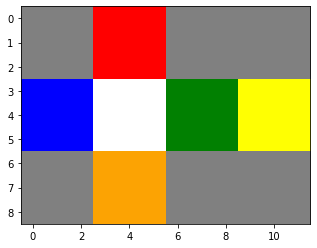

In [24]:
from cube import *

create_cube_visualization(initial_cube)

## 2. Creating the 12 cube movement functions

As there are only 6 sides, there are only 12 possible moviments, turning each side clockwise and counterclockwise.

Each of my functions will be <direction> or <direction>_<inverse> and receive a 6x9 matrix of numbers and return a matrix with the corresponding transformation.

As I am creating a representation that is an abstraction of the reality, I believe the best way to do these transformations is step by step.

All the results were checked using this [website](https://rubikscu.be/) and a real Rubik's cube.

![cube movements](https://blog.rubiks.com/wp-content/uploads/2018/08/how-to-solve-cube-formula.png)

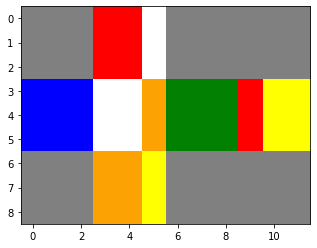

In [25]:
# right
create_cube_visualization(right(initial_cube))

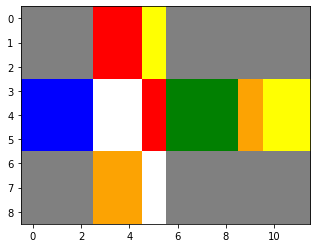

In [26]:
# right_inverse
create_cube_visualization(right_inverse(initial_cube))

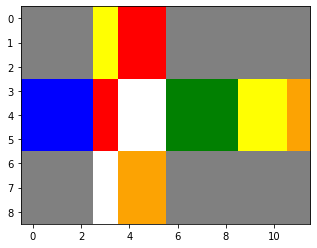

In [27]:
# left
create_cube_visualization(left(initial_cube))

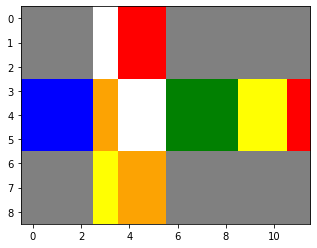

In [28]:
# left_inverse
create_cube_visualization(left_inverse(initial_cube))

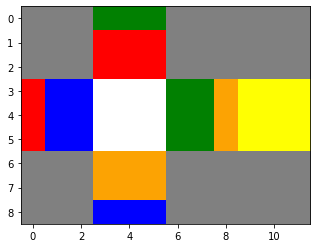

In [29]:
# back
create_cube_visualization(back(initial_cube))

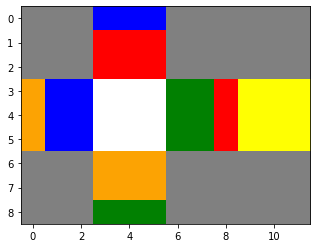

In [30]:
# back_inverse
create_cube_visualization(back_inverse(initial_cube))

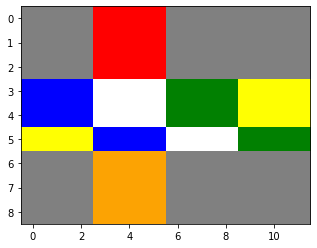

In [31]:
# down
create_cube_visualization(down(initial_cube))

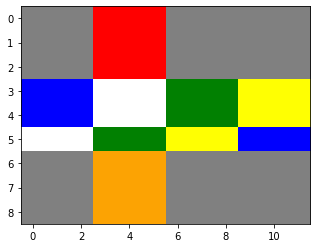

In [32]:
# down inverse
create_cube_visualization(down_inverse(initial_cube))

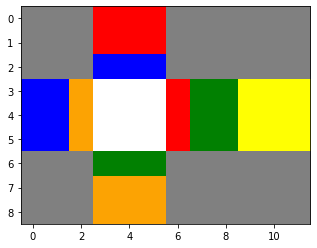

In [33]:
# front
create_cube_visualization(front(initial_cube))

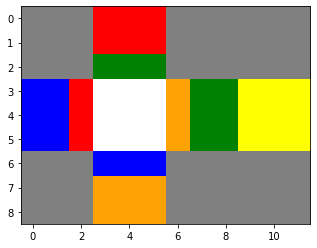

In [34]:
# front_inverse
create_cube_visualization(front_inverse(initial_cube))

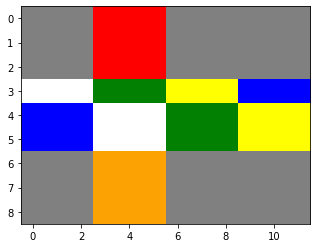

In [35]:
# up
create_cube_visualization(up(initial_cube))

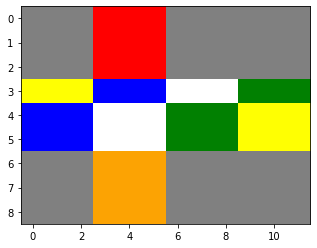

In [36]:
# up_inverse
create_cube_visualization(up_inverse(initial_cube))

In [44]:
import random

# list with all moviment functions
move_func = [["right", right], ["right_inverse", right_inverse], ["left", left], ["left_inverse", left_inverse], 
            ["back", back], ["back_inverse", back_inverse], ["front", front], ["front_inverse", front_inverse], 
            ["down", down], ["down_inverse", down_inverse], ["up", up], ["up_inverse", up_inverse]]


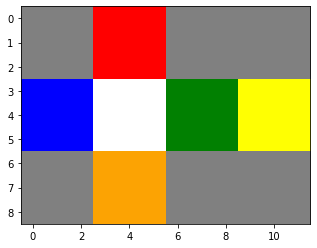

In [45]:
# creating brand new Rubik's cube
magic = [ [i for _ in range(9)] for i in range(6) ]

create_cube_visualization(magic)

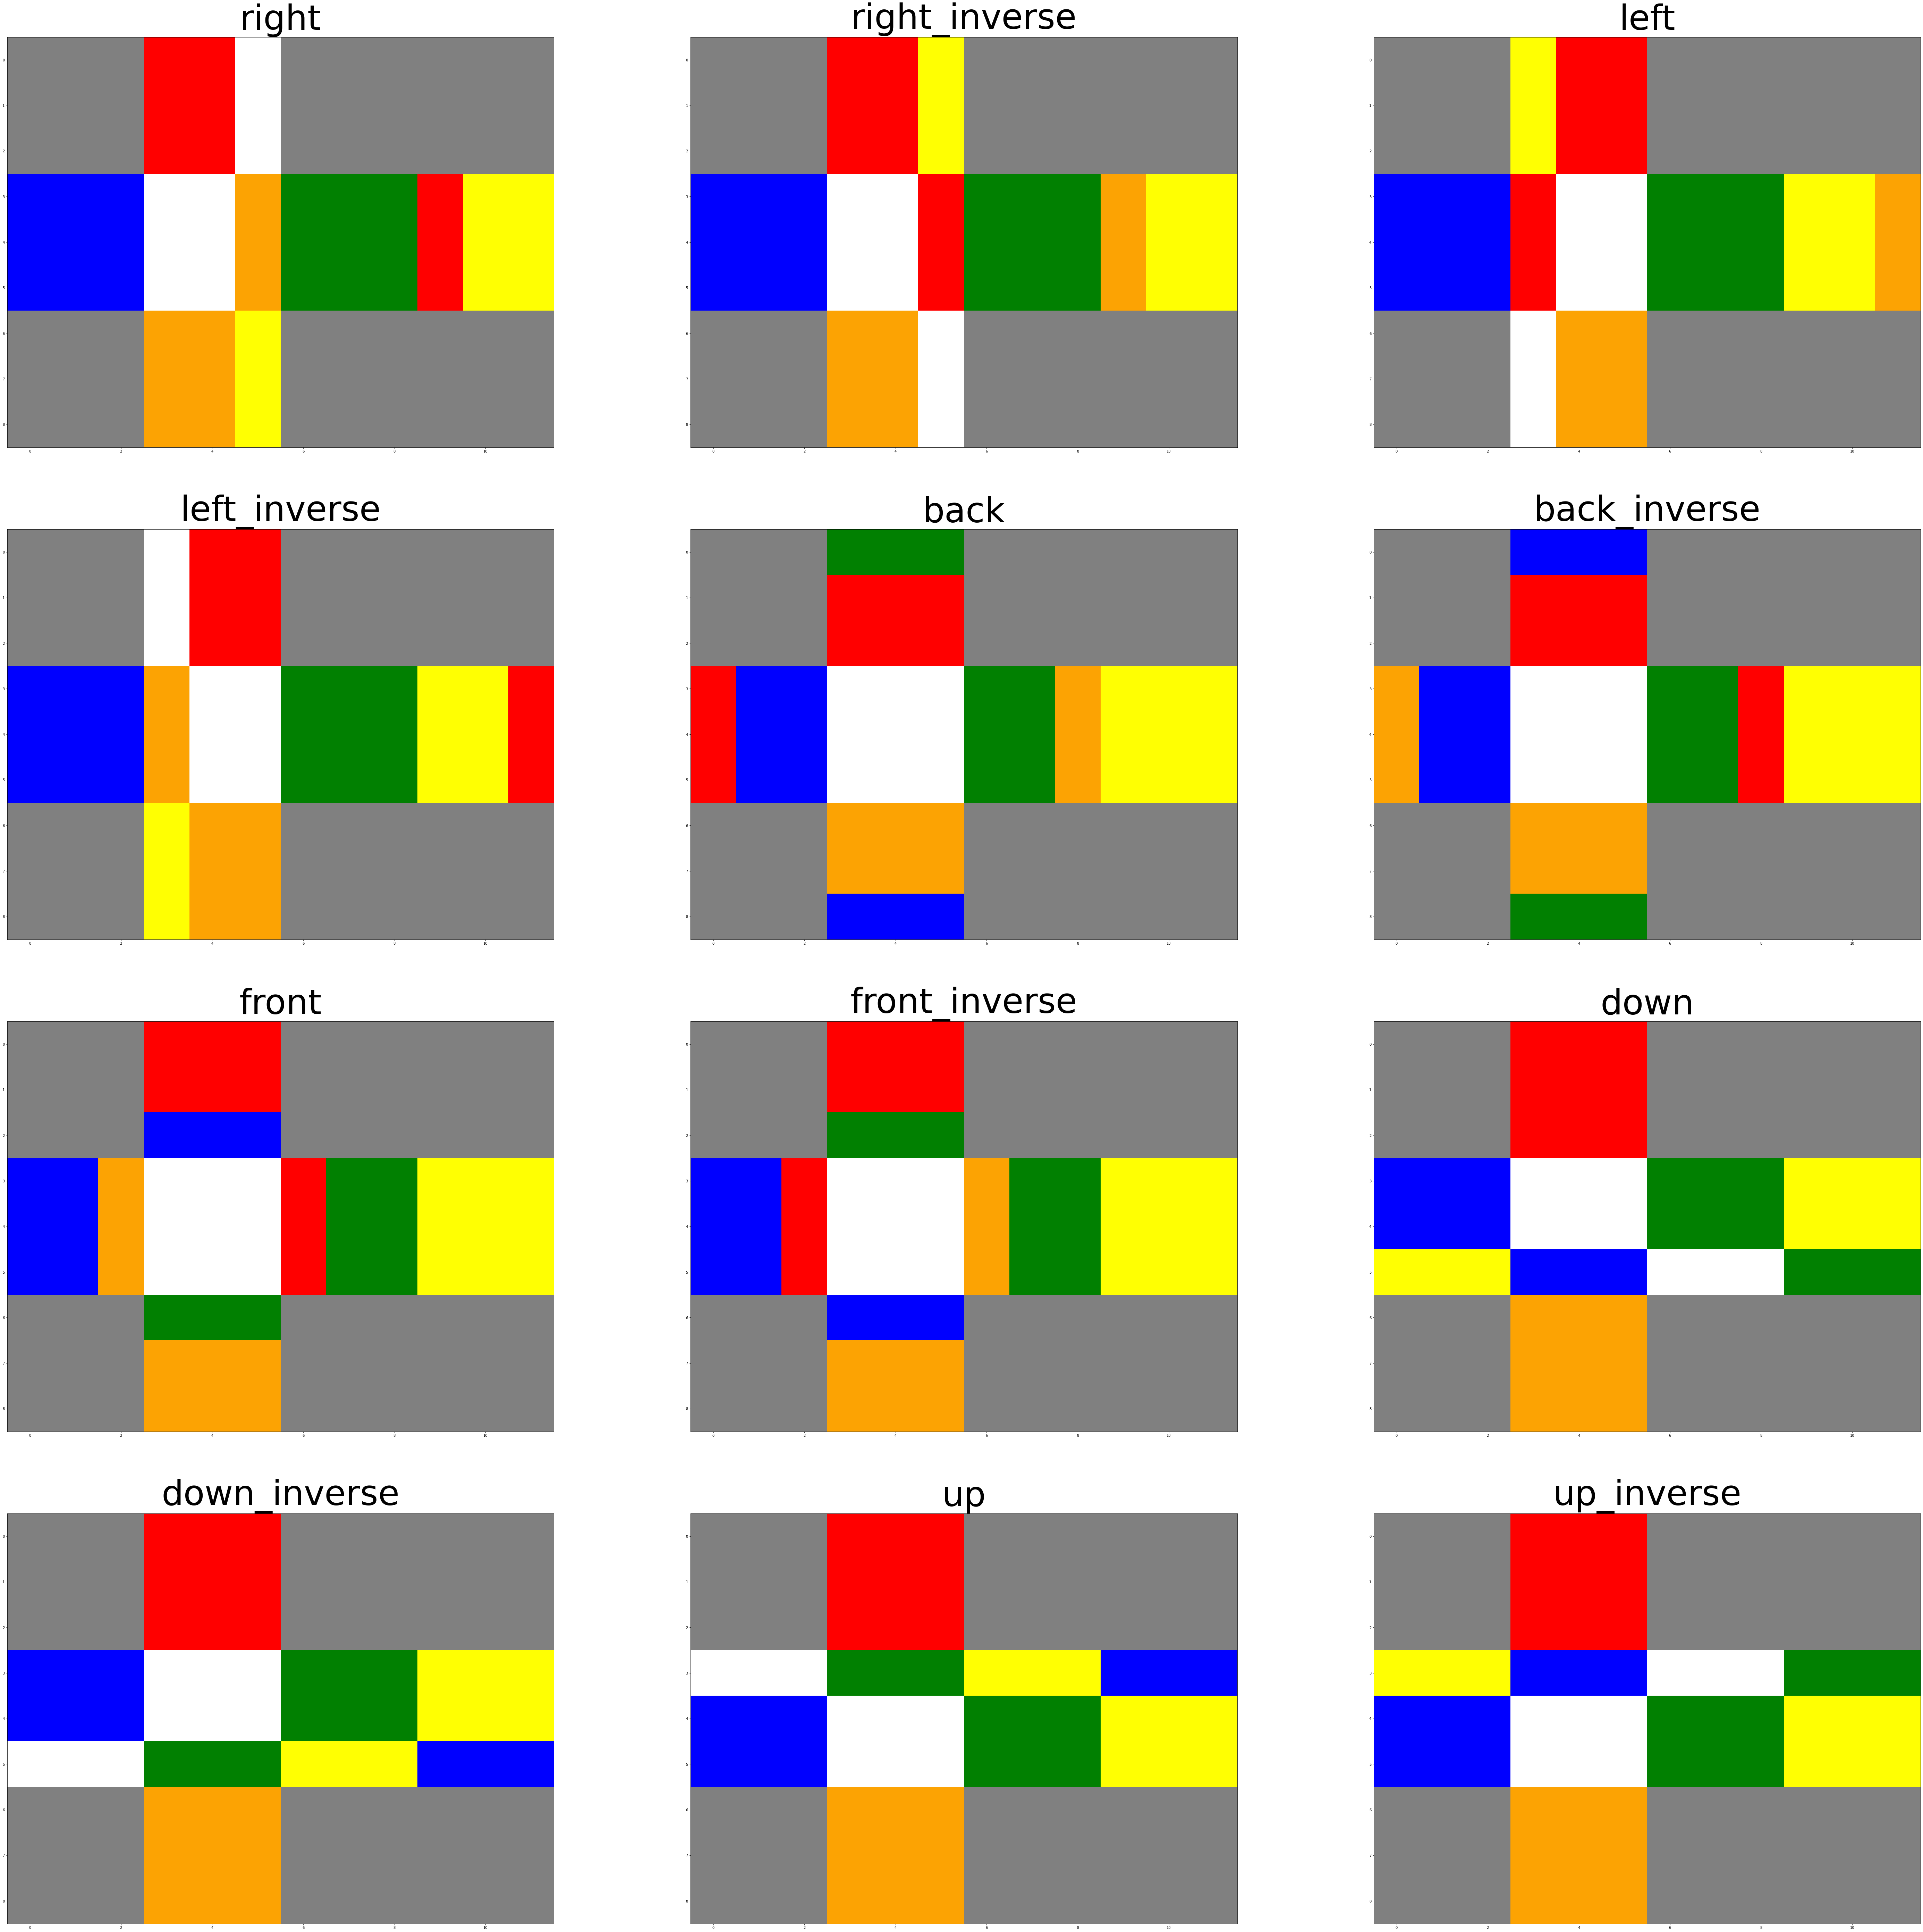

In [46]:
# creating a plot with the shuffled movements to see that it is working
plt.figure(figsize=(100,100))

for i in range(len(move_func)):
    plt.subplot(4, 3, i+1)
    create_cube_visualization(move_func[i][1](magic))
    plt.title(move_func[i][0], fontsize = 100)
    
plt.savefig('valid_moves.png')
plt.show()

## 3. Creating csv file with 6^9 different configurations

The dataset will consist of two values, the Rubik's cube (54 values) and the depth (amount of movements taken to get from the initial position to the scrambled).

I will perform maximum 9 steps (depth) and choose only 6 random movements on each step, resulting on around 10 million datapoints.

I will record the datapoints on the csv file instead of creating a dataframe first then csv, because of memory resourses issues.

A problem I faced at first was a highly unbalanced dataset with more datapoints around 9 steps and just a few with 1 step. Now I will create many copies of each and hope it works.

In [18]:
# list with all moviment functions
move_func = [["right", right], ["right_inverse", right_inverse], ["left", left], ["left_inverse", left_inverse], 
            ["back", back], ["back_inverse", back_inverse], ["front", front], ["front_inverse", front_inverse], 
            ["down", down], ["down_inverse", down_inverse], ["up", up], ["up_inverse", up_inverse]]

In [19]:
# creating brand new Rubik's cube
cube_data = [ [i for _ in range(9)] for i in range(6) ]

In [20]:
import numpy as np
import pandas as pd

In [21]:
columns = [ 'cube_'+str(layer)+'_'+str(cubie) for layer in range(6) for cubie in range(9)]

columns.append("depth")

In [ ]:
df = pd.DataFrame(columns = columns)

df.to_csv('new_cube_dataset.csv')

for i in range(1,10):
    for j in range(i*100000):
        new_cube = [ [i for _ in range(9)] for i in range(6) ]
        for k in range(i):
            new_cube = random.choice(move_func)[1](new_cube)

        arr = np.array(new_cube).flatten()
        arr = np.append(arr, i)
        df = pd.DataFrame(arr.reshape(1,-1), columns = columns)
        df.to_csv('new_cube_dataset.csv', mode='a', header=False)

        if j%10000==0:
            print(str(i)+" "+str(j))
